<a href="https://colab.research.google.com/github/habibur-rahman-swe/MedicalImageProcessing/blob/udemy/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
transform = transforms.ToTensor()

In [ ]:
train_data = datasets.MNIST(root='/content/sample_data/Data', train=True, download=True, transform=transform)

In [ ]:
test_data = datasets.MNIST(root='/content/sample_data/Data', train=False, download=True, transform=transform)

In [ ]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: /content/sample_data/Data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [ ]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: /content/sample_data/Data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [ ]:
train_data[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [ ]:
type(train_data[0])

tuple

In [ ]:
image, label = train_data[0]

In [ ]:
image.shape

torch.Size([1, 28, 28])

In [ ]:
label

5

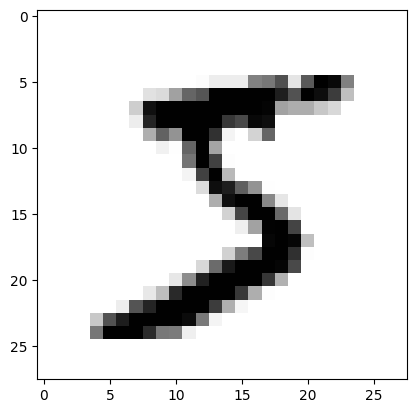

In [ ]:
plt.imshow(image.reshape((28, 28)), cmap='gist_yarg')

In [ ]:
torch.manual_seed(101)
train_loader = DataLoader(train_data, batch_size=100, shuffle=True)
test_loader = DataLoader(test_data, batch_size=500, shuffle=False)

In [ ]:
from torchvision.utils import make_grid
np.set_printoptions(formatter=dict(int=lambda x : f'{x:4}'))

In [ ]:
for images, labels in train_loader:
  break

In [ ]:
images

tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0.

In [ ]:
images.shape

torch.Size([100, 1, 28, 28])

In [ ]:
labels.shape

torch.Size([100])

In [ ]:
print('Labels : ', labels[:12].numpy())

Labels :  [   7    2    3    5    8    5    3    6    9    9    1    3]


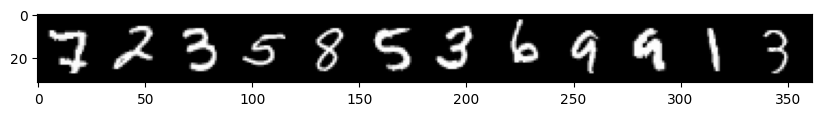

In [ ]:
im = make_grid(images[:12], nrow=12)
plt.figure(figsize=(10, 4))
plt.imshow(np.transpose(im.numpy(), (1, 2, 0)))

In [ ]:
class MultilayerPerceptron(nn.Module):
  def __init__(self, in_sz=784, out_sz=10, layers=[120, 84]):
    super().__init__()

    self.fc1 = nn.Linear(in_sz, layers[0])
    self.fc2 = nn.Linear(layers[0], layers[1])
    self.fc3 = nn.Linear(layers[1], out_sz)

  def forward(self, X):
    X = F.relu(self.fc1(X))
    X = F.relu(self.fc2(X))
    X = self.fc3(X)

    return F.log_softmax(X, dim=1) # Multi class classiication

In [ ]:
torch.manual_seed(101)
model = MultilayerPerceptron()
model

MultilayerPerceptron(
  (fc1): Linear(in_features=784, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [ ]:
for param in model.parameters():
  print(param.numel())

94080
120
10080
84
840
10


In [ ]:
criteria = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [ ]:
images

tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0.

In [ ]:
images.shape

torch.Size([100, 1, 28, 28])

In [ ]:
images.view(100, -1).shape

torch.Size([100, 784])

In [ ]:
import time
start_time = time.time()

# Training

epochs = 15

# Trackers
train_losses = []
test_losses = []
train_correct = []
test_correct = []

for i in range(epochs):
  trn_corr = 0
  tst_corr = 0

  for b, (X_train, y_train) in enumerate(train_loader):

    b += 1

    # 10 Neurons
    # [0.1, 0.0, ..., .8]
    y_pred = model(X_train.view(100, -1))
    loss = criteria(y_pred, y_train)

    predicted = torch.max(y_pred.data, 1)[1]
    batch_corr = (predicted == y_train).sum()
    trn_corr += batch_corr

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if b % 200 == 0:
      acc = trn_corr.item() * 100 / (100 * b)
      print(f'Epoch {i} batch{b} loss:{loss.item()} accuracy:{acc} ')

  train_losses.append(loss)
  train_correct.append(trn_corr)

  with torch.no_grad():
    for b, (X_test, y_test) in enumerate(test_loader):
      y_val = model(X_test.view(500, -1))

      predicted = torch.max(y_val.data, 1)[1]
      tst_corr += (predicted == y_test).sum()

  loss = criteria(y_val, y_test)
  test_losses.append(loss)
  test_correct.append(tst_corr)


total_time = time.time() - start_time
print(f'Duration: {total_time / 60} mins')

Epoch 0 batch200 loss:0.006037919316440821 accuracy:99.845 
Epoch 0 batch400 loss:0.0023648899514228106 accuracy:99.77 
Epoch 0 batch600 loss:6.82201498420909e-05 accuracy:99.76666666666667 
Epoch 1 batch200 loss:0.018947536125779152 accuracy:99.78 
Epoch 1 batch400 loss:0.01357082836329937 accuracy:99.745 
Epoch 1 batch600 loss:0.010284794494509697 accuracy:99.73166666666667 
Epoch 2 batch200 loss:0.00035240105353295803 accuracy:99.81 
Epoch 2 batch400 loss:7.430034020217136e-05 accuracy:99.805 
Epoch 2 batch600 loss:0.09228811413049698 accuracy:99.775 
Epoch 3 batch200 loss:0.0011048592859879136 accuracy:99.795 
Epoch 3 batch400 loss:0.0002891952753998339 accuracy:99.7125 
Epoch 3 batch600 loss:0.008168091997504234 accuracy:99.7 
Epoch 4 batch200 loss:7.524459215346724e-05 accuracy:99.78 
Epoch 4 batch400 loss:0.0004768652725033462 accuracy:99.83 
Epoch 4 batch600 loss:0.0019492502324283123 accuracy:99.82833333333333 
Epoch 5 batch200 loss:0.0011121887946501374 accuracy:99.885 
Epoch

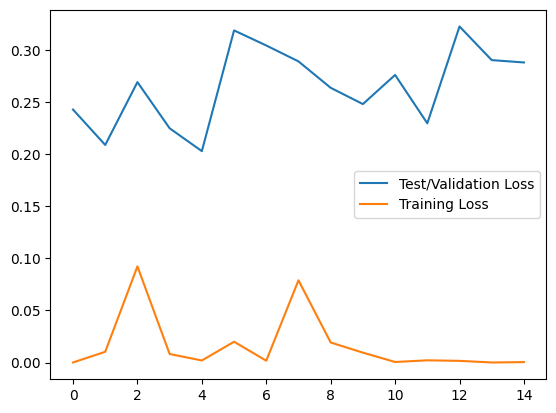

In [ ]:
import numpy as np

# Assuming train_losses is a list of PyTorch tensors
train_losses_np = [tensor.detach().numpy() for tensor in train_losses]
test_losses_np = [tensor.detach().numpy() for tensor in test_losses]

plt.plot(test_losses_np, label='Test/Validation Loss')
plt.plot(train_losses_np, label='Training Loss')
plt.legend()

In [ ]:
train_acc = [t / 600 for t in train_correct]

In [ ]:
test_acc = [t / 100 for t in test_correct]

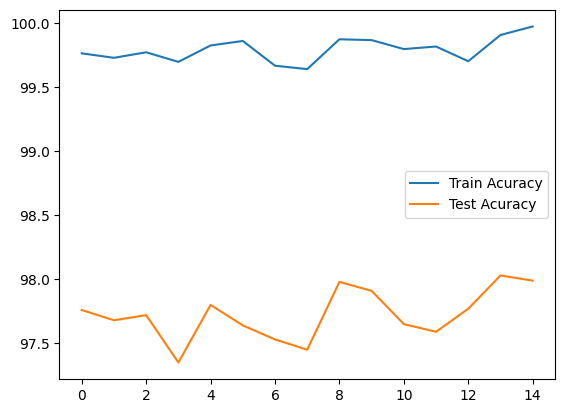

In [ ]:
plt.plot(train_acc, label='Train Acuracy')
plt.plot(test_acc, label='Test Acuracy')
plt.legend()

In [ ]:
# new unseed data
test_load_all = DataLoader(test_data, batch_size=10000, shuffle=False)

In [ ]:
with torch.no_grad():
  correct = 0

  for X_test, y_test in test_load_all:
    y_val = model(X_test.view(len(X_test), -1))
    predicted = torch.max(y_val, 1)[1]
    correct += (predicted == y_test).sum()

In [ ]:
correct.item() / len(test_data) * 100

97.99

In [ ]:
confusion_matrix(predicted.view(-1), y_test.view(-1))

array([[ 971,    0,    5,    0,    2,    2,    3,    0,    4,    2],
       [   1, 1127,    3,    0,    0,    0,    3,    5,    1,    2],
       [   1,    3, 1009,    4,    8,    0,    3,   13,    3,    1],
       [   1,    1,    4,  986,    0,    8,    1,    3,    3,    3],
       [   1,    0,    1,    0,  951,    1,    2,    1,    1,    3],
       [   0,    0,    0,    6,    2,  870,    4,    1,    0,    3],
       [   1,    1,    0,    0,    4,    2,  941,    0,    1,    0],
       [   1,    1,    3,    3,    3,    1,    0,  998,    3,    2],
       [   3,    2,    7,    3,    2,    4,    1,    1,  956,    3],
       [   0,    0,    0,    8,   10,    4,    0,    6,    2,  990]])